# Análise de Voos desviados

## Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Carragando o Banco de Dados

In [3]:
df = pd.read_csv('DelayedFlights.zip')

In [4]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [5]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [6]:
# filtrando apenas os desviados
voos_desviados = df[df['Diverted']==1]

In [7]:
# Excluindo colunas que não serão utilizadas na análise
voos_desviados.drop(['Year','TaxiIn', 'TaxiOut', 'Diverted',
                     'TailNum', 'FlightNum', 'UniqueCarrier',
                     'DepTime', 'CRSDepTime','ArrTime','CRSArrTime'], # horários
                       axis=1, inplace=True)

Verificar a quantidade de linhas com valores nulos

In [8]:
len(voos_desviados)

7754

In [29]:
voos_desviados.isnull().sum().sort_values(ascending=False)

LateAircraftDelay    7754
SecurityDelay        7754
ActualElapsedTime    7754
AirTime              7754
ArrDelay             7754
NASDelay             7754
WeatherDelay         7754
CarrierDelay         7754
CRSElapsedTime        198
Cancelled               0
CancellationCode        0
Month                   0
Distance                0
DayofMonth              0
Origin                  0
DepDelay                0
DayOfWeek               0
Dest                    0
dtype: int64

Os voos desviados não têm informações de LateAircraftDelay, SecurityDelay, ActualElapsedTime, AirTime, ArrDelay, NASDelay, WeatherDelay e CarrierDelay. Então essas colunas podem ser retiradas

In [9]:
# Excluindo colunas que não serão utilizadas na análise
voos_desviados.drop(['LateAircraftDelay', 'SecurityDelay', 
                     'ActualElapsedTime', 'AirTime', 'ArrDelay',
                     'NASDelay', 'WeatherDelay', 'CarrierDelay'], 
                       axis=1, inplace=True)

In [14]:
# porém a análise das colunas Cancelled e CancellationCode não fazem sentido pois não houve o cancelamento do voo
# tempo de voo, distância também
voos_desviados.drop(['Cancelled', 'CancellationCode', 
                     'Distance', 'CRSElapsedTime'], 
                       axis=1, inplace=True)

In [15]:
voos_desviados.nunique()

Month          12
DayofMonth     31
DayOfWeek       7
DepDelay      367
Origin        226
Dest          247
dtype: int64

In [16]:
voos_desviados.isnull().sum().sort_values(ascending=False)

Month         0
DayofMonth    0
DayOfWeek     0
DepDelay      0
Origin        0
Dest          0
dtype: int64

In [19]:
lista_var_continuas = ['DepDelay']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

In [17]:
print(voos_desviados.describe())

             Month   DayofMonth    DayOfWeek     DepDelay
count  7754.000000  7754.000000  7754.000000  7754.000000
mean      6.466340    15.918236     3.941965    62.445576
std       3.680377     8.769989     1.977361    73.363356
min       1.000000     1.000000     1.000000     6.000000
25%       3.000000     8.000000     2.000000    16.000000
50%       6.000000    16.000000     4.000000    37.000000
75%      10.000000    23.000000     6.000000    82.000000
max      12.000000    31.000000     7.000000  1154.000000


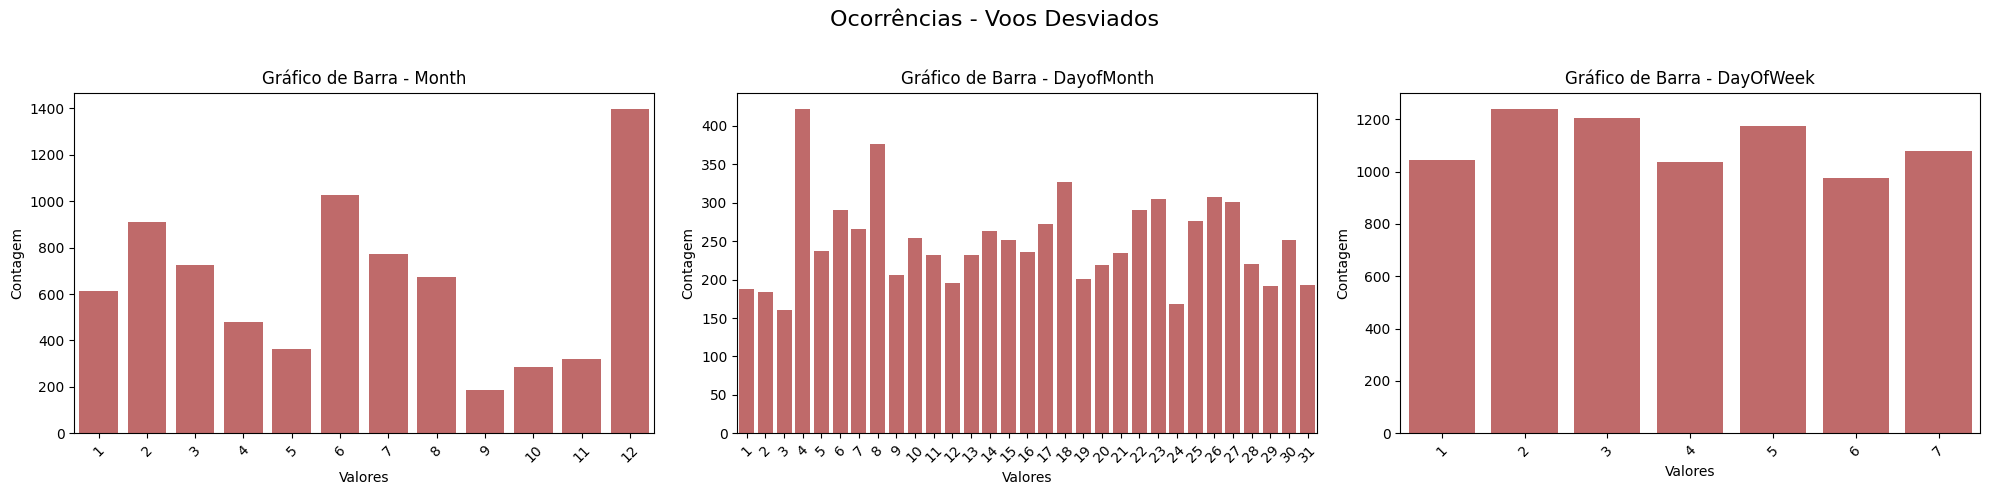

In [20]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=voos_desviados[[i]], ax=ax, color='IndianRed')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')
    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Desviados', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

In [22]:
df_num = voos_desviados.select_dtypes(include=['int64', 'float64'])
df_num.corr()

,Month,DayofMonth,DayOfWeek,DepDelay
Month,1.000000,0.192712,0.013662,-0.011460
DayofMonth,0.192712,1.000000,0.096128,-0.017775
DayOfWeek,0.013662,0.096128,1.000000,-0.021155
DepDelay,-0.011460,-0.017775,-0.021155,1.000000


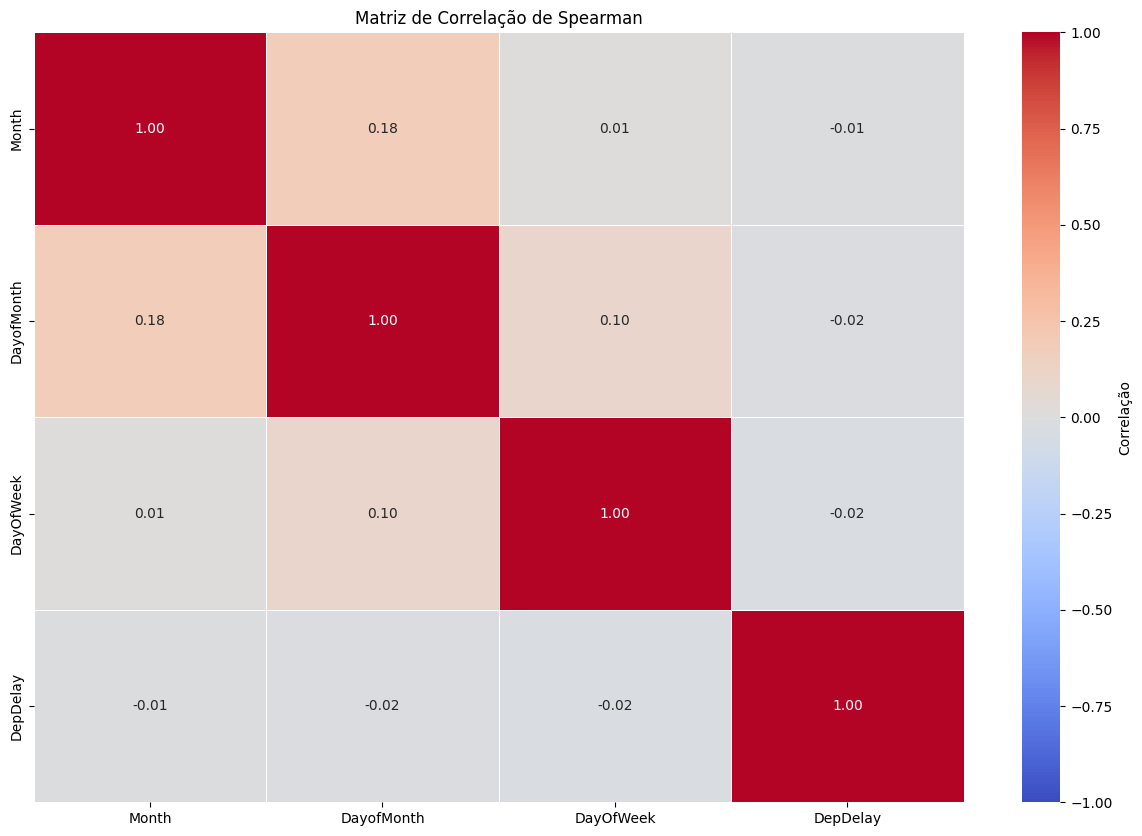

In [23]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="spearman")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Spearman")

# Exibindo o gráfico
plt.show()

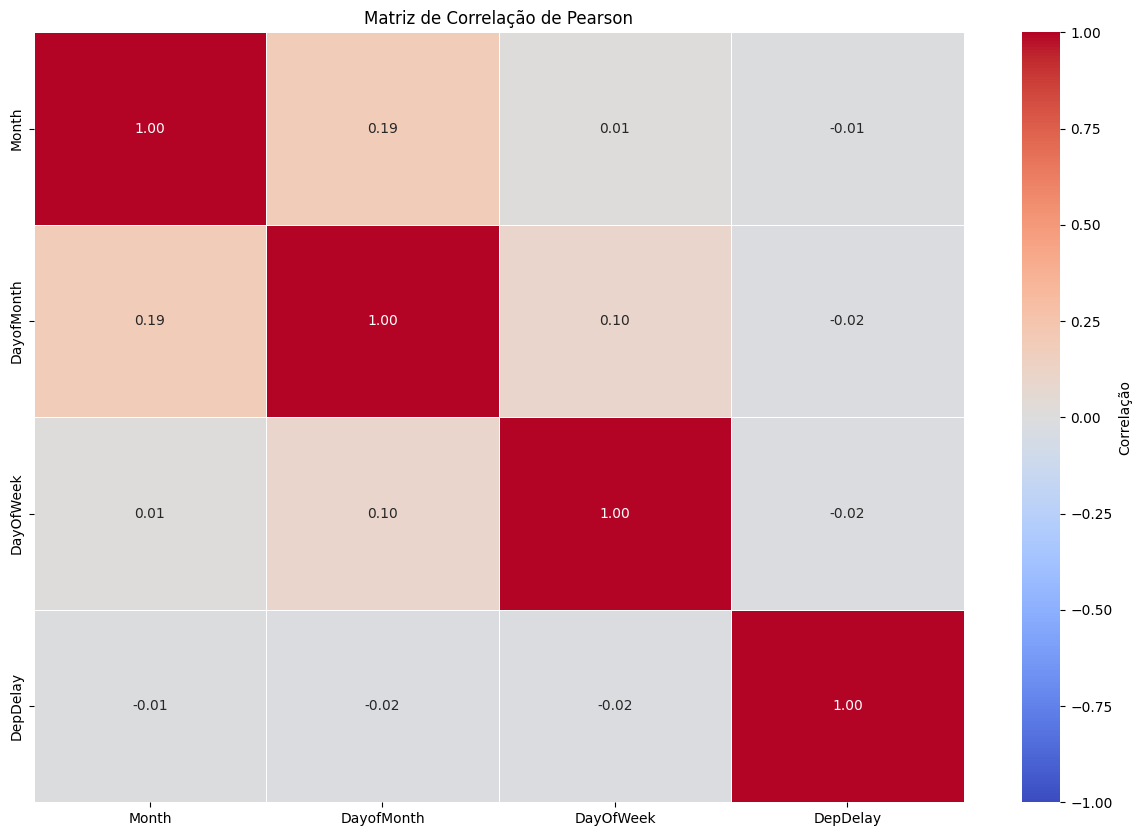

In [24]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(15, 10))

# Criando a matriz de correlação de Spearman
corr_matrix = df_num.corr(method="pearson")

# Customizando o heatmap com Seaborn
sns.heatmap(corr_matrix, annot=True, 
            cmap="coolwarm", # cores de azul até vermelho
            vmin=-1, vmax=1,  # Valores máximos e mínimos da barra de cor
            fmt=".2f", linewidths=.5, 
            cbar_kws={"label": "Correlação"})

# Adicionando título
plt.title("Matriz de Correlação de Pearson")

# Exibindo o gráfico
plt.show()

A única relação forte que há é entre a distância e o tempo estimado de voo. Pois quanto maior a distância maior será o tempo estimado de voo.

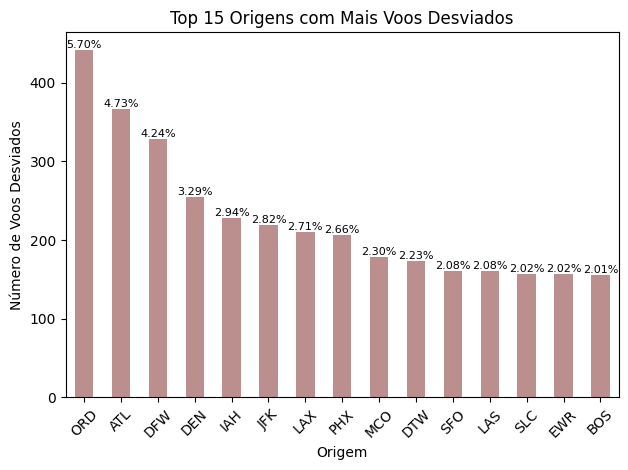

In [25]:
# Origem com mais voos desviados
voos_desviados['Origin'].value_counts().nlargest(15).plot(kind='bar', color='RosyBrown')

# Calculando contagens e porcentagens
contagens = voos_desviados['Origin'].value_counts().nlargest(15)
total_voos_desviados = len(voos_desviados)
porcentagens = (contagens / total_voos_desviados) * 100
# Adicionando rótulos e título
plt.title('Top 15 Origens com Mais Voos Desviados')
plt.xlabel('Origem')
plt.ylabel('Número de Voos Desviados')

for i, v in enumerate(contagens):
    porcentagem = porcentagens.iloc[i]
    plt.text(i, v + 0.1, f'{porcentagem:.2f}%', ha='center', va='bottom', fontsize=8)


# Melhorando a estética do gráfico
plt.xticks(rotation=45)  # Rotacionando os rótulos no eixo x para melhor legibilidade
plt.tight_layout()  # Ajustando o layout para evitar sobreposição

# Exibindo o gráfico
plt.show()

In [26]:
contagens_normalizadas = voos_desviados['Month'].value_counts()
print(contagens_normalizadas)

Month
12    1397
6     1026
2      909
7      774
3      726
8      674
1      612
4      481
5      361
11     321
10     285
9      188
Name: count, dtype: int64


voos cancelados em todos os meses do ano

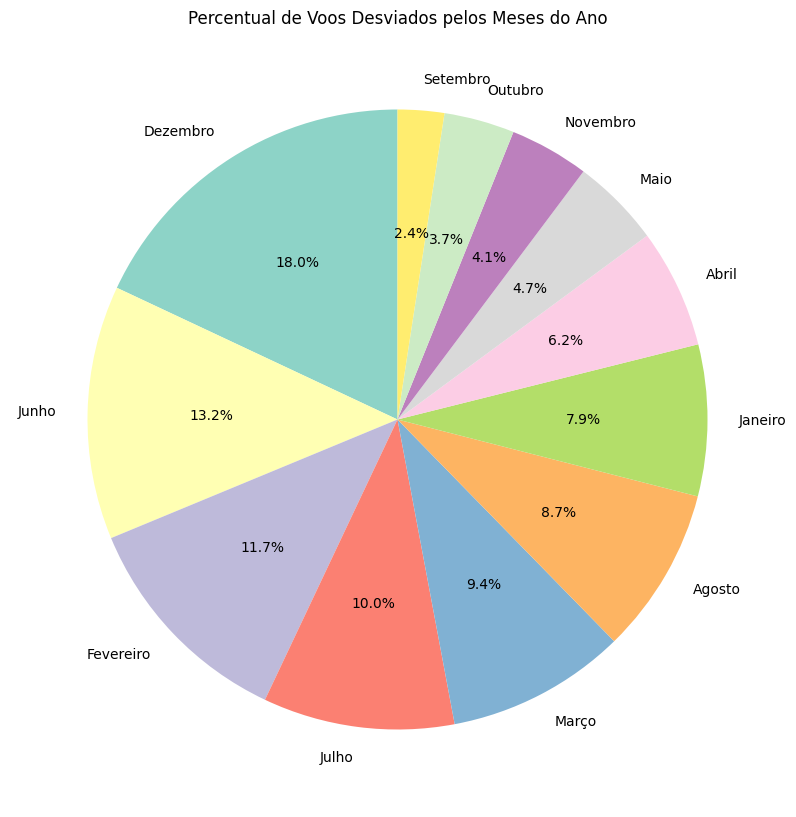

In [27]:
# colocanos na ordem apresentadas no value_counts
meses_do_ano = ['Dezembro', 'Junho', 'Fevereiro',
                'Julho','Março', 'Agosto', 'Janeiro',
                'Abril', 'Maio','Novembro','Outubro', 'Setembro']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=meses_do_ano, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Meses do Ano')
plt.show()

In [28]:
contagens_normalizadas = voos_desviados['DayOfWeek'].value_counts(normalize=True) * 100
print(contagens_normalizadas)

DayOfWeek
2    15.978850
3    15.514573
5    15.153469
7    13.902502
1    13.464019
4    13.386639
6    12.599948
Name: proportion, dtype: float64


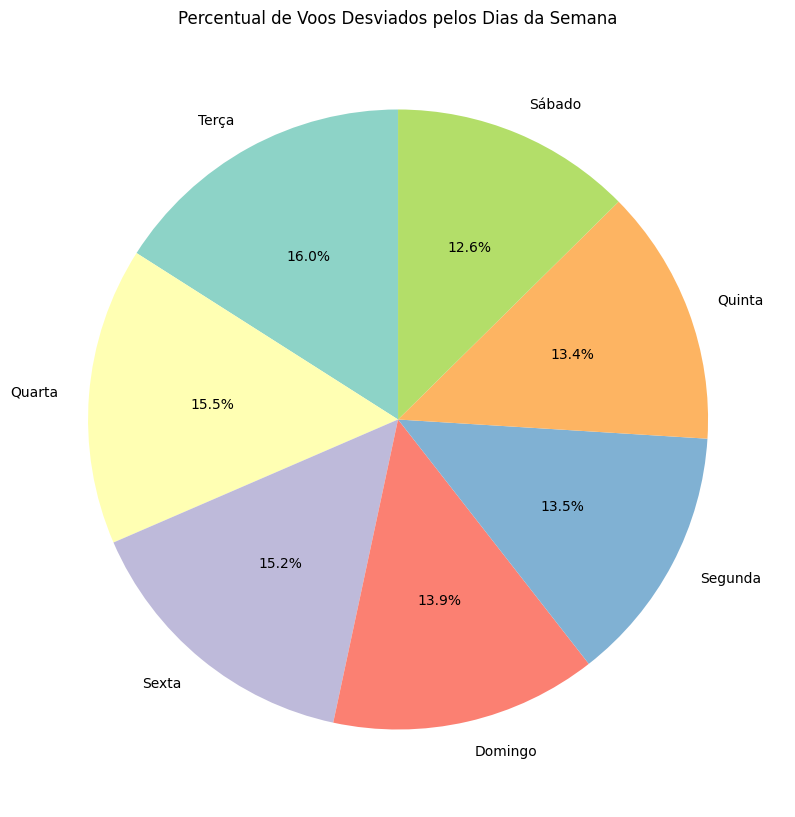

In [74]:
# colocanos na ordem apresentadas no value_counts
dias_da_semana = ['Terça', 'Quarta', 'Sexta',
                'Domingo','Segunda', 'Quinta', 'Sábado']
colors = plt.cm.Set3(range(len(meses_do_ano)))
# Criando o gráfico de pizza
plt.figure(figsize=(10, 20))
plt.pie(contagens_normalizadas, labels=dias_da_semana, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentual de Voos Desviados pelos Dias da Semana')
plt.show()